In [1]:
from torch_lr_finder import LRFinder
from models import ENet, SRNet
import numpy as np
import os

model = ENet('efficientnet-b0')
data_dir = '../input/alaska2-image-steganalysis'
sample_size = 5000
val_size = int(sample_size*0.25)


jmipod = sorted([f'../input/alaska2-image-steganalysis/JMiPOD/{x}'
                 for x in os.listdir('../input/alaska2-image-steganalysis/JMiPOD/')],
                key=lambda x: x.split('/')[-1].split('.')[0])[:sample_size]
juniward = sorted([f'../input/alaska2-image-steganalysis/JUNIWARD/{x}'
                   for x in os.listdir('../input/alaska2-image-steganalysis/JUNIWARD/')])[:sample_size]
uerd = sorted([f'../input/alaska2-image-steganalysis/UERD/{x}'
               for x in os.listdir('../input/alaska2-image-steganalysis/UERD/')])[:sample_size]
covers = sorted([f'../input/alaska2-image-steganalysis/Cover/{x}'
                 for x in os.listdir('../input/alaska2-image-steganalysis/Cover/')])[:sample_size]
test = [f'../input/alaska2-image-steganalysis/Test/{x}'
        for x in os.listdir('../input/alaska2-image-steganalysis/Test/')]

labels = {f'{id}': 0 for id in covers}
labels.update({f'{id}': 1 for id in jmipod})
labels.update({f'{id}': 2 for id in juniward})
labels.update({f'{id}': 3 for id in uerd})

items = np.array(list(labels.items()))
np.random.shuffle(items)
labels = {idx_: int(label) for (idx_, label) in items}
train_keys = list(labels.keys())

Loaded pretrained weights for efficientnet-b0


In [5]:
import albumentations as albu
from albumentations.pytorch import ToTensorV2
from torch.utils.data import DataLoader
from dataset import ALASKAData2
p=0.5
train_data = DataLoader(
    ALASKAData2(
        train_keys, labels, albu.Compose([
            albu.HorizontalFlip(p=p),
            albu.VerticalFlip(p=p),
            albu.Normalize(),
            ToTensorV2()  # albu.Lambda(image=to_tensor)
        ])
    ), batch_size=12, shuffle=True, num_workers=2)




Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


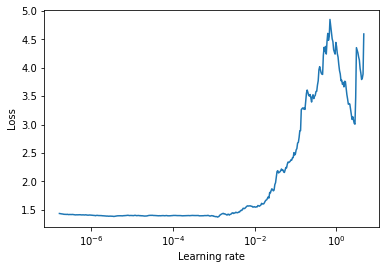

In [6]:
from torch import nn, optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_data, end_lr=100, num_iter=500)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [7]:
lr_finder.best_loss

1.3709757360410735

In [4]:
train_data.dataset.__getitem__??

In [16]:
8192*2

16384